# Testning av KNN modell.

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io, transform
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
root_folder = "C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease" #emmelies root

In [3]:
def load_dataset(root_folder):
    sick_fish_list = []
    healthy_fish_list = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Check if the current item is a file (not a subdirectory)
                if os.path.isfile(file_path):
                    img = io.imread(file_path)
                    label = file_name.split('_')[0].lower()

                    if "healthy" in label:
                        healthy_fish_list.append(img)
                    else:
                        sick_fish_list.append(img)

    return sick_fish_list, healthy_fish_list

In [4]:
sick_fish_list, healthy_fish_list = load_dataset(root_folder)

In [5]:
# print(len(sick_fish_list))
# print(len(healthy_fish_list))

In [6]:
#sick_fish_list[1]

In [7]:
def resize_images(image_list, target_size=(100, 100)):
    resized_images = [transform.resize(img, target_size, mode='reflect', anti_aliasing=True) for img in image_list]
    return resized_images

def convert_to_grayscale(image_list):
    grayscale_images = [rgb2gray(img) for img in image_list]
    return grayscale_images

def normalize_images(image_list):
    normalized_images = [img / 255.0 for img in image_list]
    return normalized_images

def flatten_and_resize_images(image_list, target_size=(100, 100), expected_size=30000):
    resized_and_flattened_images = [
        img if img.size == expected_size else None
        for img in [
            transform.resize(img, target_size, mode='reflect', anti_aliasing=True)
            for img in image_list
        ]
    ]
    resized_and_flattened_images = [img.flatten() for img in resized_and_flattened_images if img is not None]
    return resized_and_flattened_images

In [8]:
resized_sick_fish_list = resize_images(sick_fish_list)
resized_healthy_fish_list = resize_images(healthy_fish_list)

In [9]:
normalized_sick_fish_list = normalize_images(resized_sick_fish_list)
normalized_healthy_fish_list = normalize_images(resized_healthy_fish_list)

In [10]:
resized_and_flattened_sick_fish_list = flatten_and_resize_images(sick_fish_list)
resized_and_flattened_healthy_fish_list = flatten_and_resize_images(healthy_fish_list)

In [11]:
#resized_and_flattened_sick_fish_list[2]

In [12]:
print(len(resized_and_flattened_sick_fish_list))
print(len(resized_and_flattened_healthy_fish_list))

267
154


In [13]:
x = resized_and_flattened_sick_fish_list + resized_and_flattened_healthy_fish_list
y = ["sick"] * len(resized_and_flattened_sick_fish_list) + ["healthy"] * len(resized_and_flattened_healthy_fish_list)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
x_train_flat = [img.flatten() for img in x_train]
knn_model.fit(x_train_flat, y_train)

KNeighborsClassifier()

### Flattening

In [16]:
indices_to_flatten = [i for i, img in enumerate(x_test) if img.size == 30000]

x_test_flat_reshaped = np.array([img.flatten() for i, img in enumerate(x_test) if i in indices_to_flatten])

### Test printar vid fel på flattening:

In [17]:
# indices_not_flattened = [i for i in range(len(x_test)) if i not in indices_to_flatten]

# # Print the indices of images not flattened
# print("Indices not flattened:", indices_not_flattened)

In [18]:
# print("Size of image at index 78:", x_test[78].size)
# print("Size of image at index 84:", x_test[84].size)

# Predict:

In [19]:
y_pred = knn_model.predict(x_test_flat_reshaped)

### Fler felhanterings printar:

In [20]:
# print("Length of x:", len(x))
# print("Length of y:", len(y))

In [21]:
# print("Length of y_test:", len(y_test))
# print("Length of y_pred:", len(y_pred))

# Accuracy:

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6705882352941176


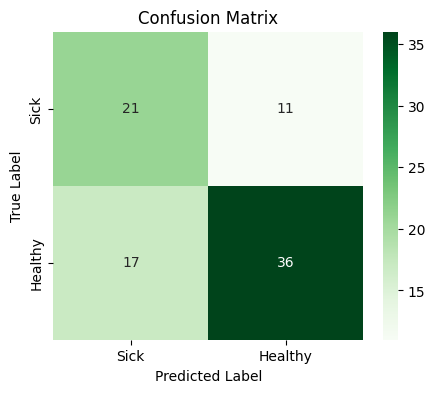

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Sick', 'Healthy'], yticklabels=['Sick', 'Healthy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Testning:

In [ ]:

def preprocess_image(img_path):
    img = io.imread(img_path)
    resized_img = transform.resize(img, (100, 100), mode='reflect', anti_aliasing=True)
    grayscale_img = rgb2gray(resized_img)
    flattened_img = grayscale_img.flatten()
    
    flattened_img = np.pad(flattened_img, (0, 30000 - len(flattened_img)))
    
    return flattened_img, resized_img

def test_image(model, img_path):
    flattened_img, resized_img = preprocess_image(img_path)

    flattened_img_2d = flattened_img.reshape(1, -1)
    
    prediction = model.predict([flattened_img])[0]
    probability = model.predict_proba(flattened_img_2d)[:, 1]

    plt.imshow(resized_img, cmap='gray')
    plt.title(f"Prediction: {prediction} (Probability: {probability[0]*100:.2f}%)")
    plt.show()


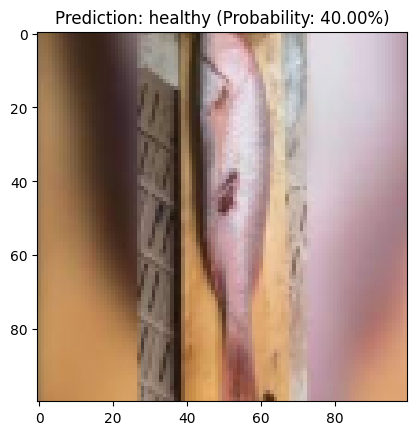

In [30]:
test_image(knn_model, 'dataset/test_img/sick_fishy_1.jpg')

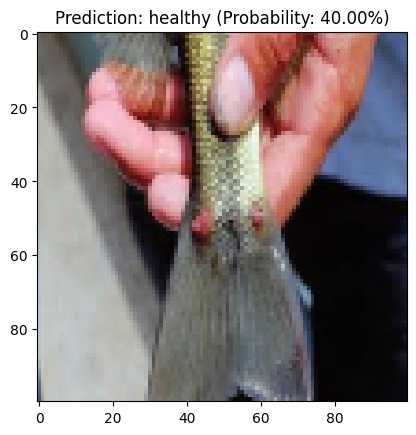

In [31]:
test_image(knn_model, 'dataset/test_img/sick_fishy_2.jpg')

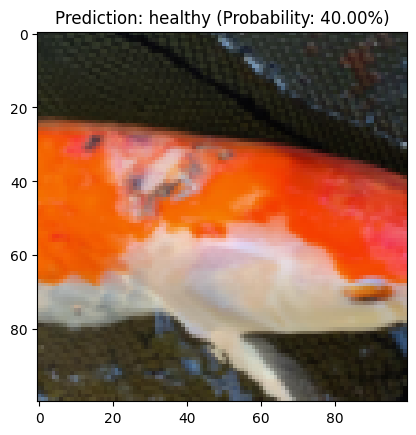

In [32]:
test_image(knn_model, 'dataset/test_img/sick_koi_1.jpg')

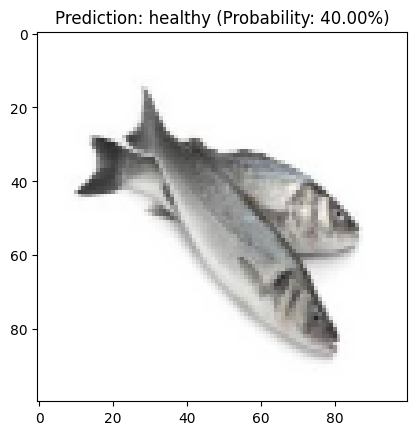

In [33]:
test_image(knn_model, 'dataset/test_img/healthy_fishy_1.jpg')

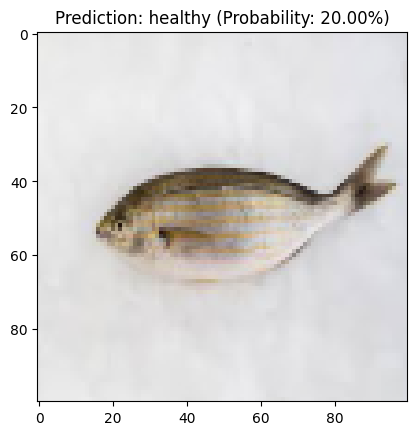

In [34]:
test_image(knn_model, 'dataset/test_img/healthy_fishy_2.jpg')